In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [3]:
from google.colab import files
uploaded = files.upload()


Saving IFT2.csv to IFT2.csv


## Data Preprocessing

In [4]:
df_data = pd.read_csv("IFT2.csv")

print(df_data.head())

   Water  Acidity   BDV     DF  Colour  IFT Label
0     13    0.005  48.0  0.038     2.0   24  good
1     22    0.096  68.0  0.021     3.0   17   bad
2      8    0.030  70.0  0.013     1.0   26  good
3     12    0.032  57.0  0.010     1.0   26  good
4      6    0.036  77.0  0.034     2.0   24  good


In [5]:
def generate_labels(label):
    if(label =="excellent"):
        return 0
    elif(label =="good"):
        return 1
    elif(label =="bad"):
        return 2

df_data['labels'] = df_data.apply(lambda x : generate_labels(x['Label']),axis=1)
df_data.drop(columns=['Label','IFT'],inplace=True,axis=1)
print(df_data.head())

   Water  Acidity   BDV     DF  Colour  labels
0     13    0.005  48.0  0.038     2.0       1
1     22    0.096  68.0  0.021     3.0       2
2      8    0.030  70.0  0.013     1.0       1
3     12    0.032  57.0  0.010     1.0       1
4      6    0.036  77.0  0.034     2.0       1


In [6]:
df_class_0 = df_data[df_data['labels']==0]
df_class_1 = df_data[df_data['labels']==1]
df_class_2 = df_data[df_data['labels']==2]

print(df_class_2.head())

   Water  Acidity   BDV     DF  Colour  labels
1     22    0.096  68.0  0.021     3.0       2
5     12    0.055  58.0  0.025     2.0       2
6     12    0.041  86.0  0.040     2.0       2
7     25    0.174  63.0  0.058     3.0       2
8     18    0.031  56.0  0.040     1.0       2


In [7]:

from sklearn.preprocessing import MinMaxScaler

y_data_0 = df_class_0['labels'].values
y_data_1 = df_class_1['labels'].values
y_data_2 = df_class_2['labels'].values

scaler = MinMaxScaler()
X_data_0 = scaler.fit_transform(df_class_0.iloc[:,0:5].values)
X_data_1 = scaler.fit_transform(df_class_1.iloc[:,0:5].values)
X_data_2 = scaler.fit_transform(df_class_2.iloc[:,0:5].values)

print(X_data_0.shape)
print(X_data_1.shape)
print(X_data_2.shape)

(507, 5)
(78, 5)
(145, 5)


## Generator Model

In [0]:
def generator(z,reuse=None):  
  with tf.variable_scope('generator_inst',reuse=reuse):
    hidden1 = tf.layers.dense(inputs=z,units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1, hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1,units=128 )
    
    hidden2 = tf.maximum(alpha*hidden2,hidden2)
    output = tf.layers.dense(hidden2,units=5,activation=tf.nn.tanh)
    
    return output

## Discriminator Model

In [0]:
def discriminator(X,reuse=None):
  with tf.variable_scope('discrim',reuse=reuse):
    hidden1 = tf.layers.dense(inputs=X,units=128)
    
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1, hidden1)
    
    hidden2 = tf.layers.dense(inputs=hidden1,units=128 )
    
    hidden2 = tf.maximum(alpha*hidden2,hidden2)
    logits = tf.layers.dense(hidden2,units=1)
    output = tf.sigmoid(logits)
    
    return output,logits

## Loss Function & Training

In [0]:
real_data = tf.placeholder(tf.float64, shape=[None,5])
z = tf.placeholder(tf.float64,shape=[None,3])




In [11]:
G = generator(z)
D_output_real , D_logits_real = discriminator(real_data)
D_output_fake, D_logits_fake = discriminator(G,True)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [12]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.90)
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_fake))

D_total_loss = D_real_loss + D_fake_loss

G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
learning_rate = 0.001

tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'discrim' in var.name]
g_vars = [var for var in tvars if 'generator_inst' in var.name]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_total_loss,var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss , var_list=g_vars)

In [16]:

epochs = 1000
init = tf.global_variables_initializer()
samples = []

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(epochs):
    print("epoch_number = ",epoch)
    z_input = np.random.uniform(-1,1,size = (X_data_1.shape[0],3))
    _= sess.run(D_trainer,feed_dict={real_data:X_data_1, z: z_input})
    _= sess.run(G_trainer, feed_dict={z:z_input})
    
    

epoch_number =  0
epoch_number =  1
epoch_number =  2
epoch_number =  3
epoch_number =  4
epoch_number =  5
epoch_number =  6
epoch_number =  7
epoch_number =  8
epoch_number =  9
epoch_number =  10
epoch_number =  11
epoch_number =  12
epoch_number =  13
epoch_number =  14
epoch_number =  15
epoch_number =  16
epoch_number =  17
epoch_number =  18
epoch_number =  19
epoch_number =  20
epoch_number =  21
epoch_number =  22
epoch_number =  23
epoch_number =  24
epoch_number =  25
epoch_number =  26
epoch_number =  27
epoch_number =  28
epoch_number =  29
epoch_number =  30
epoch_number =  31
epoch_number =  32
epoch_number =  33
epoch_number =  34
epoch_number =  35
epoch_number =  36
epoch_number =  37
epoch_number =  38
epoch_number =  39
epoch_number =  40
epoch_number =  41
epoch_number =  42
epoch_number =  43
epoch_number =  44
epoch_number =  45
epoch_number =  46
epoch_number =  47
epoch_number =  48
epoch_number =  49
epoch_number =  50
epoch_number =  51
epoch_number =  52
epo

## Data Generation & Results

In [0]:
new_samples=[]
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(0,10):
      z_input = np.random.uniform(-1,1,size=(1,3))
      gen_sample = sess.run(generator(z_input,True), feed_dict={z:z_input})
      new_samples.append(gen_sample)
    
    

In [18]:
samples_generated = np.array(new_samples)
samples_generated = samples_generated.reshape(samples_generated.shape[0],samples_generated.shape[2])
print("samples_generated = ",samples_generated)
print("samples_generated.shape = ", samples_generated.shape)

samples_generated =  [[ 0.01597542  0.08723885 -0.01605659  0.05430642 -0.05590374]
 [ 0.0162783  -0.01701913  0.04085963  0.02316111 -0.05965538]
 [ 0.02749983 -0.00661915  0.07436059  0.05349003 -0.09099751]
 [-0.05833     0.02306802 -0.02647208 -0.01769769  0.01320555]
 [-0.06722295 -0.12205312  0.04196228  0.1739282  -0.10435576]
 [-0.01822151  0.03123248 -0.02102979  0.02150549 -0.00078284]
 [-0.05636005 -0.11959759 -0.00803818  0.10434437 -0.1242864 ]
 [-0.03481039  0.02082106 -0.00850454 -0.01580573  0.01427045]
 [-0.07225012 -0.00493956 -0.03104319 -0.0065215   0.01762819]
 [-0.02183818 -0.02250307  0.02178563  0.08787965 -0.04203064]]
samples_generated.shape =  (10, 5)


(78, 2)
df_data_old = 
        dim1       dim2 label
0 -42.128632 -34.536983   old
1  -0.082840  11.576146   old
2  -2.647653  20.001587   old
3 -12.412882 -36.393044   old
4 -41.100300  24.367674   old
(78, 3)
df_data_new = 
         dim1        dim2 label
0  -42.236084 -241.170288   new
1 -259.455170 -204.876266   new
2 -134.886658  311.977264   new
3 -365.012238  -11.598149   new
4 -141.273239  -38.754139   new
(10, 3)
df_data_combined
        dim1       dim2 label
0 -42.128632 -34.536983   old
1  -0.082840  11.576146   old
2  -2.647653  20.001587   old
3 -12.412882 -36.393044   old
4 -41.100300  24.367674   old
(88, 3)


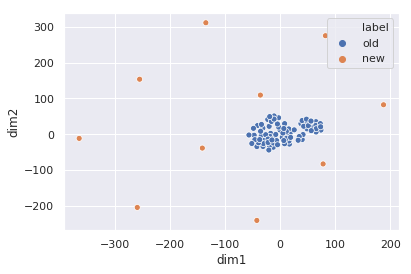

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns; sns.set()
X_embedded_1 = TSNE(n_components=2).fit_transform(X_data_1)
X_embedded_new = TSNE(n_components=2).fit_transform(samples_generated)

print(X_embedded_1.shape)


df_data_old = pd.DataFrame(X_embedded_1)
df_data_old.columns = ['dim1','dim2']
df_data_old['label'] = "old"

df_data_new = pd.DataFrame(X_embedded_new)
df_data_new.columns = ['dim1','dim2']
df_data_new['label'] = "new"



print("df_data_old = ")
print(df_data_old.head())
print(df_data_old.shape)
print("df_data_new = ")
print(df_data_new.head())
print(df_data_new.shape)

print("df_data_combined")
df_data_combined = pd.concat([df_data_old,df_data_new])
print(df_data_combined.head())

print(df_data_combined.shape)


ax = sns.scatterplot(x="dim1", y="dim2", hue="label",data=df_data_combined)
#plt.scatter(X_embedded_1[:,0],X_embedded_1[:,1])
#plt.scatter(X_embedded_new[:,0],X_embedded_new[:,1])
